In [1]:
import numpy as np
from keras.applications.efficientnet import EfficientNetB7, preprocess_input, decode_predictions
from keras.preprocessing import image
import matplotlib.pyplot as plt

2024-05-30 13:18:58.490454: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Load the EfficientNetB7 model with pre-trained ImageNet weights
model = EfficientNetB7(include_top=True, weights='imagenet')

268326632/268326632 ━━━━━━━━━━━━━━━━━━━━ 23s 0us/step


In [3]:
model.summary()

Model: "efficientnetb7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 600, 600,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 600, 600,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 600, 600,  │          7 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_1         │ (None, 600, 600,  │          0 │ normalization[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 601, 601,  │          0 │ rescaling_1[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 300, 300,  │      1,728 │ stem_conv_pad[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 300, 300,  │        256 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 300, 300,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 300, 300,  │        576 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 300, 300,  │        256 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 300, 300,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 64)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 64)  │          0 │ block1a_se_squee… │
│ (Reshape)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reduce   │ (None, 1, 1, 16)  │      1,040 │ block1a_se_resha… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_expand   │ (None, 1, 1, 64)  │      1,088 │ block1a_se_reduc… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_excite   │ (None, 300, 300,  │          0 │ block1a_activati… │
│ (Multiply)          │ 64)               │            │ block1a_se_expan… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 300, 300,  │      2,048 │ block1a_se_excit

 Total params: 66,658,687 (254.28 MB)

 Trainable params: 66,347,960 (253.10 MB)

 Non-trainable params: 310,727 (1.19 MB)

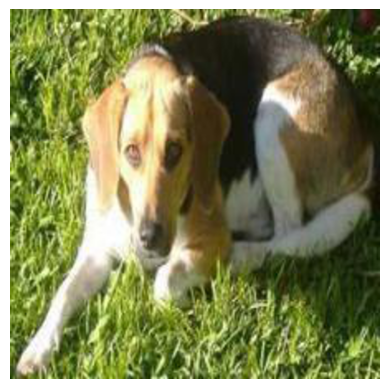

In [11]:
from PIL import Image
import matplotlib.pyplot as plt

# Trying to run model prediction with photo of beagle
image_path = "../Resources/cropped/train/n02088364-beagle/n02088364_3758.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (600, 600)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1: beagle (0.56)
2: Walker_hound (0.14)
3: English_foxhound (0.13)


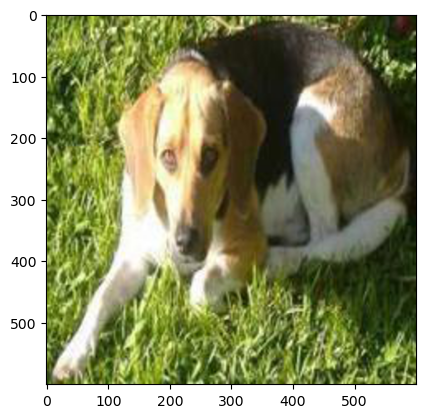

In [12]:
# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the input format of the model (1, 600, 600, 3)
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the EfficientNetB7 model
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to get human-readable labels
decoded_predictions = decode_predictions(predictions, top=3)[0]

# Print the top-5 predictions
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")
plt.imshow(img)

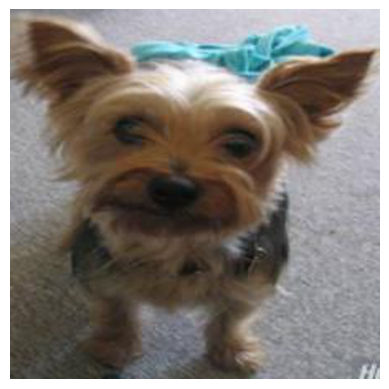

In [13]:
# Trying to run model prediction with photo of yorkshire terrior
image_path = "../Resources/cropped/train/n02094433-Yorkshire_terrier/n02094433_515.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (600, 600)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1: Yorkshire_terrier (0.71)
2: Australian_terrier (0.05)
3: silky_terrier (0.05)


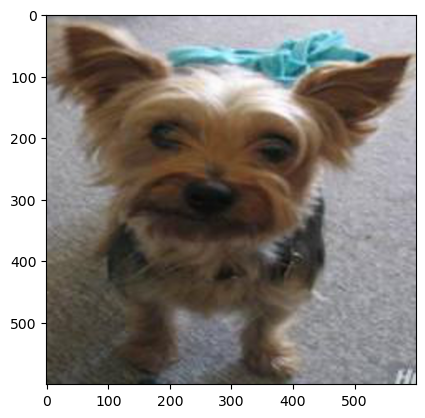

In [14]:
# change the image to an array 
img_array = image.img_to_array(img)

# expand the photo to fit the parameters of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the MobileNet model
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to get human-readable labels
decoded_predictions = decode_predictions(predictions, top=3)[0]

# show the photo and run a loop to generate results
plt.imshow(img)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

In [15]:
results = decode_predictions(predictions)[0]
dic = [{'breed': res[1], 'prediction': res[2]} for res in results]

In [16]:
import pandas as pd

__df = pd.DataFrame(dic)

In [17]:
__df.head()

,breed,prediction
0,Yorkshire_terrier,0.707574
1,Australian_terrier,0.049668
2,silky_terrier,0.046728
3,toy_terrier,0.012989
4,Maltese_dog,0.005984


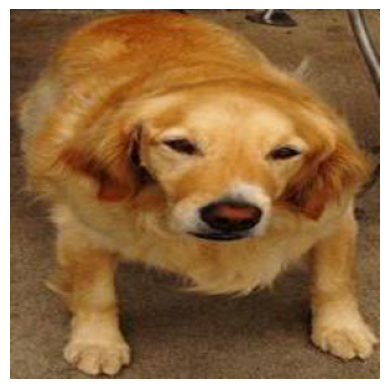

In [18]:
# Trying to run model prediction with photo of golden retriever
image_path = "../Resources/cropped/train/n02099601-golden_retriever/n02099601_704.jpg"

# Load the image using PIL
img = Image.open(image_path)

# Resize the image if necessary
image_size = (299, 299)
img = img.resize(image_size)

# Display the image using matplotlib
plt.imshow(img)
plt.axis('off')  # Hide the axis
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
1: golden_retriever (0.79)
2: Labrador_retriever (0.02)
3: Sussex_spaniel (0.01)


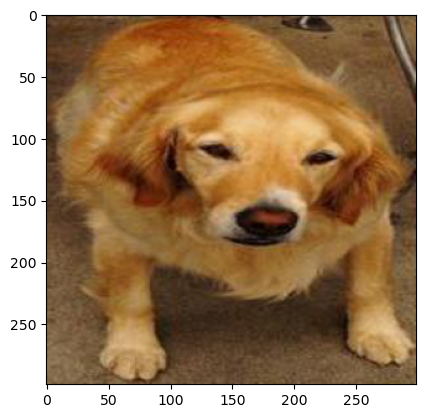

In [19]:
# change the image to an array 
img_array = image.img_to_array(img)

# expand the photo to fit the parameters of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image for the MobileNet model
img_array = preprocess_input(img_array)

# Make a prediction
predictions = model.predict(img_array)

# Decode the predictions to get human-readable labels
decoded_predictions = decode_predictions(predictions, top=3)[0]

# show the photo and run a loop to generate results
plt.imshow(img)
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

In [20]:
# prepare the dataframe of results and write to csv
file_path = "../Outputs/efficient_net_b7_model.csv"
__df.to_csv(file_path, index=False)
print(f"DataFrame wrote to csv successfully. ")

DataFrame wrote to csv successfully. 
